# PBMC3k: 90% Cells: 2688 Features: 13139

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocess

In [4]:
import os
path = 'C:/Users/jzhou417/Desktop/pbmc3k/'
if os.path.exists(path):
    files = os.listdir(path)
files

['.ipynb_checkpoints',
 '.Rhistory',
 '1',
 '90',
 '90new',
 'barcodes.tsv',
 'Comparison-sc10x-3c.ipynb',
 'cooc',
 'cooc.csv',
 'cooc1',
 'cooc_standard',
 'filtered_feature_bc_matrix',
 'genes.tsv',
 'matrix.mtx',
 'pbmc_orign.ipynb',
 'R.txt',
 'RaceID3.csv',
 'RaceID3new.csv',
 'sc10x-3c-sce.rds',
 'sc10x-3c.rds',
 'sc3_results.xls',
 'sc3_results1.xls',
 'server',
 'seurat-R-stan.csv',
 'seurat-R.csv',
 'seurat-R1.csv',
 'seurat-R8.csv',
 'seurat-Rrs1.csv',
 'web_summary.html']

In [5]:
table = pd.read_csv(os.path.join(path, 'seurat-R-stan.csv'))
table.head(10)

,barcode,seurat_clusters
0,AAACATACAACCAC,3
1,AAACATTGAGCTAC,4
2,AAACATTGATCAGC,1
3,AAACCGTGCTTCCG,5
4,AAACCGTGTATGCG,6
5,AAACGCACTGGTAC,1
6,AAACGCTGACCAGT,3
7,AAACGCTGGTTCTT,3
8,AAACGCTGTAGCCA,3
9,AAACGCTGTTTCTG,5


In [69]:
R_10x = pd.read_csv('seurat-Rrs2.csv')
R_10x["barcode"] = R_10x['Unnamed: 0']
R_10x.pop('Unnamed: 0')
newdata = table.merge(R_10x, on='barcode')
newdata['target'] = newdata['seurat_clusters_x'].factorize()[0]

In [70]:
newdata

,barcode,seurat_clusters_x,seurat_clusters_y,target
0,AAACATACAACCAC,3,8,0
1,AAACATTGAGCTAC,4,2,1
2,AAACATTGATCAGC,1,0,2
3,AAACCGTGCTTCCG,5,7,3
4,AAACCGTGTATGCG,6,9,4
...,...,...,...,...
2626,TTTCGAACTCTCAT,7,10,8
2627,TTTCTACTGAGGCA,4,2,1
2628,TTTCTACTTCCTCG,4,2,1
2629,TTTGCATGAGAGGC,4,2,1


In [6]:
sc3 = pd.read_excel('sc3_results.xls')
sc3_r = table.merge(sc3, on="barcode")
sc3_r['target'] = sc3_r['seurat_clusters'].factorize()[0]

In [7]:
sc3_r.head(10)

,barcode,seurat_clusters,sc3_10_clusters,sc3_10_log2_outlier_score,target
0,AAACATACAACCAC,3,7,0.000000,0
1,AAACATTGAGCTAC,4,6,1.226897,1
2,AAACATTGATCAGC,1,3,1.256535,2
3,AAACCGTGCTTCCG,5,5,0.000000,3
4,AAACCGTGTATGCG,6,8,0.000000,4
5,AAACGCACTGGTAC,1,3,0.000000,2
6,AAACGCTGACCAGT,3,7,0.000000,0
7,AAACGCTGGTTCTT,3,7,0.000000,0
8,AAACGCTGTAGCCA,3,7,0.000000,0
9,AAACGCTGTTTCTG,5,10,0.000000,3


In [31]:
cooc = pd.read_csv('cooc.csv').T.reset_index()[1:]
cooc["barcode"] = cooc["index"]
cooc["cooc_clusters"] = cooc.loc[:,0]
cooc.pop("index")
cooc.pop(0)
cooc_data = table.merge(cooc, on="barcode")
cooc_data['target'] = cooc_data['seurat_clusters'].factorize()[0]

In [32]:
cooc_data.head(10)

,barcode,seurat_clusters,cooc_clusters,target
0,AAACATACAACCAC,3,8,0
1,AAACATTGAGCTAC,4,9,1
2,AAACATTGATCAGC,1,8,2
3,AAACCGTGCTTCCG,5,3,3
4,AAACCGTGTATGCG,6,5,4
5,AAACGCACTGGTAC,1,8,2
6,AAACGCTGACCAGT,3,6,0
7,AAACGCTGGTTCTT,3,8,0
8,AAACGCTGTAGCCA,3,8,0
9,AAACGCTGTTTCTG,5,5,3


In [23]:
race = pd.read_csv('RaceID3.csv')
race["barcode"] = race["Unnamed: 0"]
race.pop("Unnamed: 0")
race_data = table.merge(race, on="barcode")
race_data['target'] = race_data['seurat_clusters'].factorize()[0]

In [24]:
race_data.head(10)

,barcode,seurat_clusters,V1,target
0,AAACATACAACCAC,3,1,0
1,AAACATTGAGCTAC,4,2,1
2,AAACATTGATCAGC,1,3,2
3,AAACCGTGCTTCCG,5,4,3
4,AAACCGTGTATGCG,6,54,4
5,AAACGCACTGGTAC,1,6,2
6,AAACGCTGACCAGT,3,1,0
7,AAACGCTGGTTCTT,3,1,0
8,AAACGCTGTAGCCA,3,3,0
9,AAACGCTGTTTCTG,5,4,3


# Cluster Count

In [10]:
def cluster_counts(df, cluster_name, name):
    print("Cluster counts for {}".format(name))
    groups = df.groupby(by = cluster_name)
    return groups["target"].describe()[['count']]

In [11]:
cluster_counts(sc3_r, 'sc3_10_clusters', '3. sc3 10x')

Cluster counts for 3. sc3 10x


,count
sc3_10_clusters,
1,512.0
2,112.0
3,474.0
4,175.0
5,324.0
6,342.0
7,349.0
8,153.0
9,20.0


In [30]:
cluster_counts(cooc_data, 'seurat_clusters', '4. cooc 10x')

Cluster counts for 4. cooc 10x


,count
seurat_clusters,
0,594.0
1,512.0
2,461.0
3,350.0
4,345.0
5,167.0
6,145.0
7,35.0
8,12.0


In [33]:
cluster_counts(cooc_data, 'cooc_clusters', '4. cooc 10x')

Cluster counts for 4. cooc 10x


,count
cooc_clusters,
1,21.0
2,105.0
3,433.0
4,11.0
5,118.0
6,228.0
7,127.0
8,1242.0
9,346.0


# Compare with Seurat

In [61]:
def reorder(df):
    
    dic = {i: np.argmax(df.loc[:,i].values) for i in range(1, len(df.columns)+1)}
    dic = sorted(dic.items(), key = lambda x: x[1])
    df_new = pd.concat([df.loc[:,col] for col, target in dic],axis=1)
    
    # Normalize
    #df_new = df_new.apply(lambda x: x/x.sum(), axis=0)
    
    return df_new

def reorder_seurat(df):
    
    dic = {i: np.argmax(df.loc[:,i].values) for i in range(1, len(df.columns))}
    dic = sorted(dic.items(), key = lambda x: x[1])
    df_new = pd.concat([df.loc[:,col] for col, target in dic],axis=1)
    
    # Normalize
    #df_new = df_new.apply(lambda x: x/x.sum(), axis=0)
    
    return df_new

In [62]:
df_r = pd.crosstab(newdata['target'], newdata['seurat_clusters_y'])
df_r_s = df_r.copy()
df_r_s["sum"] = df_r.sum(axis=1)
df_r_s

seurat_clusters_y,0,1,2,3,4,5,6,7,8,9,10,11,sum
target,,,,,,,,,,,,,
0,5,0,0,272,2,0,0,0,68,3,0,0,350
1,0,0,347,0,0,0,0,0,0,0,0,0,347
2,377,85,0,6,0,0,0,0,44,0,0,0,512
3,0,0,0,0,0,1,5,162,0,0,0,0,168
4,0,0,0,4,0,0,0,0,0,141,0,0,145
5,6,278,0,0,260,0,0,0,50,0,0,0,594
6,0,0,0,0,0,263,194,8,0,0,1,0,466
7,0,0,0,0,0,0,0,0,0,0,0,13,13
8,0,0,0,0,0,0,0,0,0,0,36,0,36


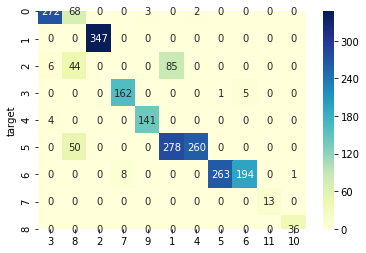

In [63]:
df_r = reorder_seurat(df_r)
sns.heatmap(df_r, cmap="YlGnBu", annot=True, fmt="d")

In [26]:
df_sc3 = pd.crosstab(sc3_r['target'], sc3_r['sc3_10_clusters'])
df_sc3_s = df_sc3.copy()
df_sc3_s["sum"] = df_sc3_s.sum(axis=1)
df_sc3_s

sc3_10_clusters,1,2,3,4,5,6,7,8,9,10,sum
target,,,,,,,,,,,
0,5,2,19,0,0,1,312,11,0,0,350
1,0,1,0,0,0,341,1,0,4,0,347
2,68,55,365,0,0,0,22,0,2,0,512
3,0,0,0,4,2,0,0,0,0,162,168
4,0,0,0,0,0,0,3,142,0,0,145
5,439,54,90,0,0,0,11,0,0,0,594
6,0,0,0,140,318,0,0,0,0,8,466
7,0,0,0,0,1,0,0,0,12,0,13
8,0,0,0,31,3,0,0,0,2,0,36


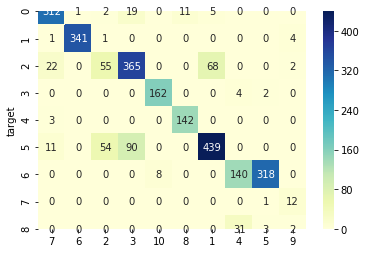

In [27]:
df_sc3 = reorder(df_sc3)
sns.heatmap(df_sc3, cmap="YlGnBu", annot=True, fmt="d")

In [34]:
df_cooc = pd.crosstab(cooc_data['target'], cooc_data[cooc_data['cooc_clusters']<20]['cooc_clusters'])
df_cooc_s = df_cooc.copy()
df_cooc_s["sum"] = df_cooc.sum(axis=1)
df_cooc_s

cooc_clusters,1,2,3,4,5,6,7,8,9,sum
target,,,,,,,,,,
0,0,0,0,0,1,84,114,151,0,350
1,0,0,0,0,2,0,0,0,345,347
2,0,0,0,0,0,0,13,499,0,512
3,0,101,61,0,6,0,0,0,0,168
4,0,0,0,0,1,144,0,0,0,145
5,0,0,0,0,2,0,0,592,0,594
6,0,4,356,0,106,0,0,0,0,466
7,0,0,2,11,0,0,0,0,0,13
8,21,0,14,0,0,0,0,0,1,36


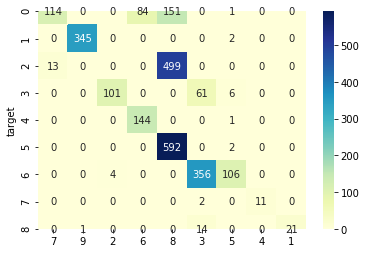

In [35]:
df_cooc = reorder(df_cooc)
sns.heatmap(df_cooc, cmap="YlGnBu", annot=True, fmt="d")

In [28]:
df_race = pd.crosstab(race_data['target'], race_data[race_data['V1']<13]['V1'])
df_race_s = df_race.copy()
df_race_s["sum"] = df_race.sum(axis=1)
df_race_s

V1,1,2,3,4,5,6,7,8,9,10,11,12,sum
target,,,,,,,,,,,,,
0,70,0,152,0,65,20,0,0,0,0,31,0,338
1,65,211,7,0,1,24,0,2,2,0,9,0,321
2,192,0,96,0,16,24,0,0,0,0,177,1,506
3,0,0,0,146,0,0,0,0,0,20,2,0,168
4,2,0,2,0,122,0,0,0,0,0,6,0,132
5,346,0,55,0,1,126,0,0,0,0,58,0,586
6,0,0,0,99,0,0,214,0,0,129,2,3,447
7,0,0,0,0,0,0,0,0,1,1,0,0,2
8,1,1,0,0,0,0,4,0,0,1,2,27,36


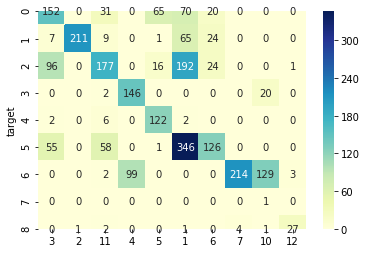

In [30]:
df_race = reorder(df_race)
df_race = df_race.drop(columns = [8,9])
sns.heatmap(df_race, cmap="YlGnBu", annot=True, fmt="d")

# Calculating the metrics

In [64]:
def calc_h_accuracy(df):
    df_norm = df.apply(lambda x: x/x.sum(), axis=0)
    df_entropy = df_norm.apply(lambda x: x*np.log2(x+0.0001))
    return -np.sum(df_entropy.sum(axis=0)) / len(df.columns)

def calc_h_purity(df):
    df_norm = df.apply(lambda x: x/x.sum(), axis=1)
    df_entropy = df_norm.apply(lambda x: x*np.log2(x+0.0001))
    return -np.sum(df_entropy.sum(axis=0)) / len(df)

In [68]:
print("======pbmc3k results======")
print("The entropy of cluster accuracy for seurat R: {:.5f}".format(calc_h_accuracy(df_r)))
print("The entropy of cluster accuracy for sc3: {:.5f}".format(calc_h_accuracy(df_sc3)))
print("The entropy of cluster accuracy for cooc: {:.5f}".format(calc_h_accuracy(df_cooc)))
print("The entropy of cluster accuracy for RaceID3: {:.5f}".format(calc_h_accuracy(df_race)))

======pbmc3k results======
The entropy of cluster accuracy for seurat R: 0.31513
The entropy of cluster accuracy for sc3: 0.66122
The entropy of cluster accuracy for cooc: 0.51026
The entropy of cluster accuracy for RaceID3: 1.03183


In [67]:
print("======pbmc3k results======")
print("The entropy of cluster purity for seurat R: {:.5f}".format(calc_h_purity(df_r)))
print("The entropy of cluster purity for sc3: {:.5f}".format(calc_h_purity(df_sc3)))
print("The entropy of cluster purity for cooc: {:.5f}".format(calc_h_purity(df_cooc)))
print("The entropy of cluster purity for RaceID3: {:.5f}".format(calc_h_purity(df_race)))

======pbmc3k results======
The entropy of cluster purity for seurat R: 0.53911
The entropy of cluster purity for sc3: 0.64433
The entropy of cluster purity for cooc: 0.62344
The entropy of cluster purity for RaceID3: 1.21667


In [71]:
from sklearn.metrics.cluster import adjusted_rand_score
print("======pbmc3k cell lines results======")
print("The ARI for seurat R (resolution=1): {:.5f}".format(adjusted_rand_score(newdata['target'], newdata['seurat_clusters_y'])))
print("The ARI for sc3: {:.5f}".format(adjusted_rand_score(sc3_r['target'], sc3_r['sc3_10_clusters'])))
print("The ARI for cooc: {:.5f}".format(adjusted_rand_score(cooc_data['target'], cooc_data['cooc_clusters'])))
print("The ARI for RaceID3: {:.5f}".format(adjusted_rand_score(race_data['target'], race_data['V1'])))

======pbmc3k cell lines results======
The ARI for seurat R (resolution=1): 0.65498
The ARI for sc3: 0.65842
The ARI for cooc: 0.50728
The ARI for RaceID3: 0.30864
